In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2024-04-04 15:44:11.563372: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-04 15:44:11.565819: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 15:44:11.611656: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 15:44:11.849347: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 15:44:14.096956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

2.16.1


In [2]:
fashion_mnist  = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape
'''
We have 60k data where each image is size 28 x 28 ie: [28 x 28 ] numpy arrays with 
values ranging from 0 to 255
'''

'\nWe have 60k data where each image is size 28 x 28 ie: [28 x 28 ] numpy arrays with \nvalues ranging from 0 to 255\n'

In [6]:
# Labels is int between 0 to 9 labelling: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

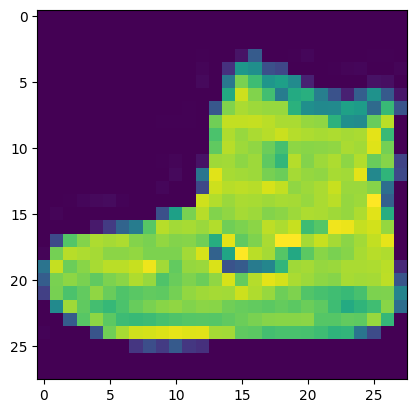

In [8]:
#  Checking the train image by plotting
plt.figure()
plt.imshow(train_images[0])
plt.colorbar
plt.grid(False)
plt.show()

In [9]:
# Converting 0 to 255 between 0 to 1 numberical value to fit the model 
train_images = train_images / 255.0

test_images = test_images / 255.0

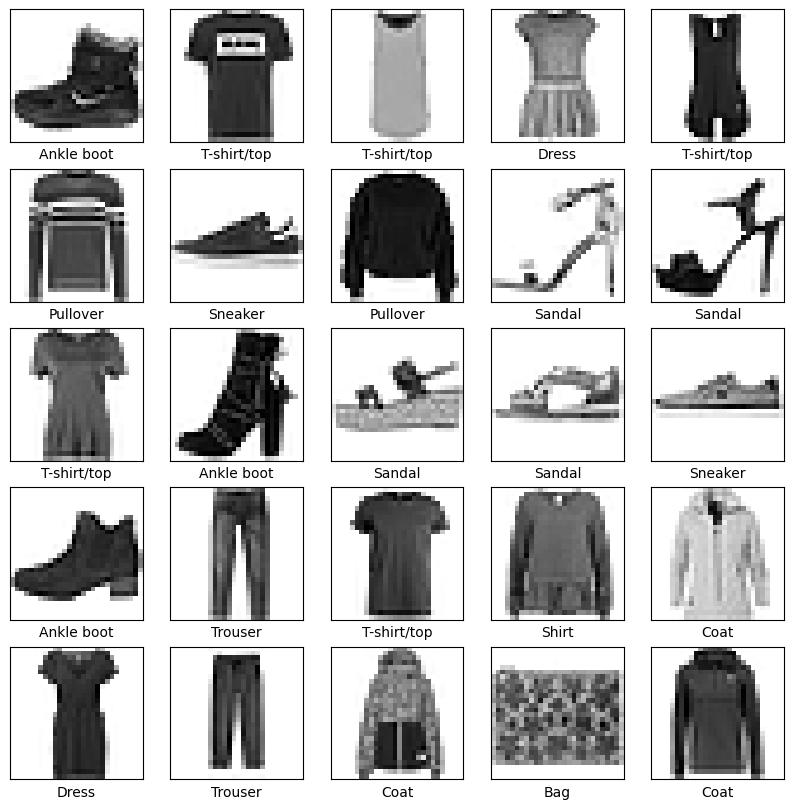

In [11]:
# Plotting the figure in 0 to 1 value to check if all good 25 images in 5 by 5 matrix

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # convert 28 * 28 = 784 pixels
    tf.keras.layers.Dense(128, activation='relu'), # The first Dense layer has 128 nodes
    tf.keras.layers.Dense(10), # returns a logits array with length of 10 with 10 labels
])

In [15]:
model.compile(optimizer='adam', # This is how the model is updated based on the data it sees and its loss function.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # accurate the model 
              metrics=['accuracy'] # monitor the training and testing
              )

In [16]:

# Start model training 
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7835 - loss: 0.6189
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8622 - loss: 0.3857
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8765 - loss: 0.3393
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8865 - loss: 0.3100
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8908 - loss: 0.2950
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8946 - loss: 0.2838
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8986 - loss: 0.2697
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9052 - loss: 0.2570
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9100 - loss: 0.2442
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9131 - loss: 0.2315


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8837 - loss: 0.3304
Test loss: 0.3304053246974945
Test accuracy: 0.8837000131607056


In [18]:
# Converts logits output to probabilities to predict easy using Softmax
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
# Testing
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [20]:
predictions[0]

array([1.8243286e-08, 3.3152217e-09, 3.9006269e-09, 2.5778841e-11,
       3.4106326e-10, 3.5965191e-03, 1.2457319e-08, 7.2004236e-03,
       2.3973820e-07, 9.8920280e-01], dtype=float32)

In [22]:
# Finding the max to get highest predicted label 
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

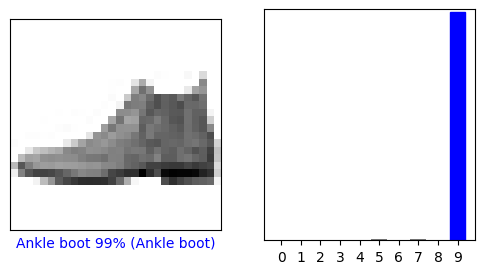

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

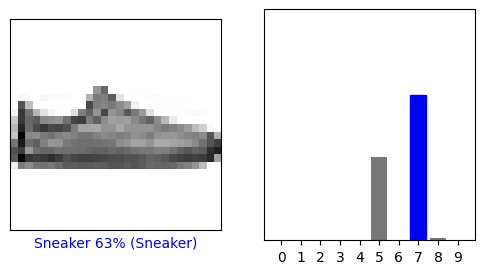

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

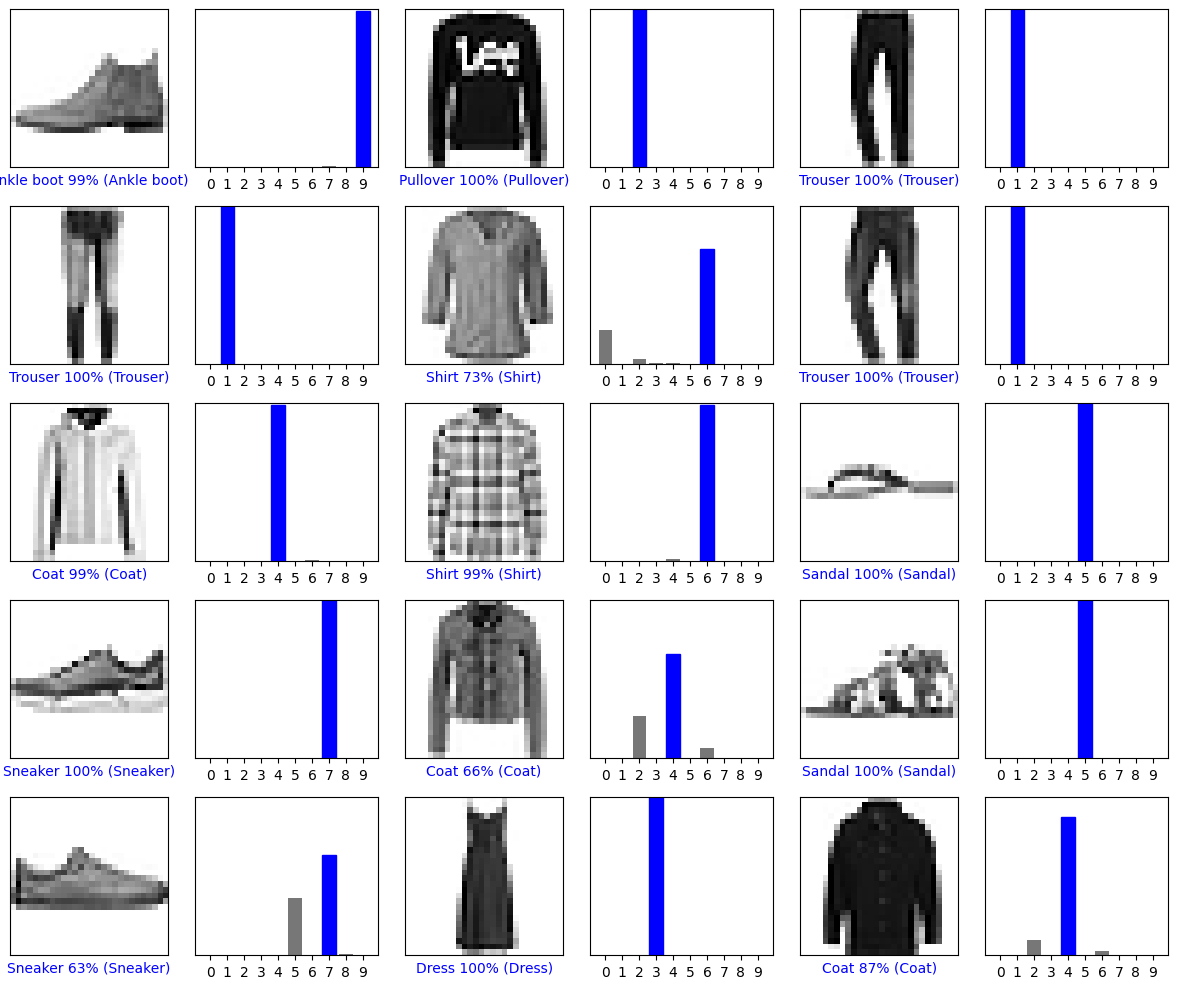

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()